In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

In [8]:
%config Completer.use_jedi = False

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
path="/content/drive/MyDrive/bank-full.csv"
df = pd.read_csv(path ,sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

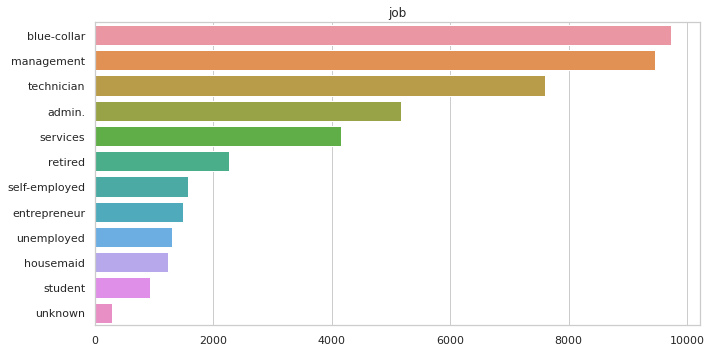

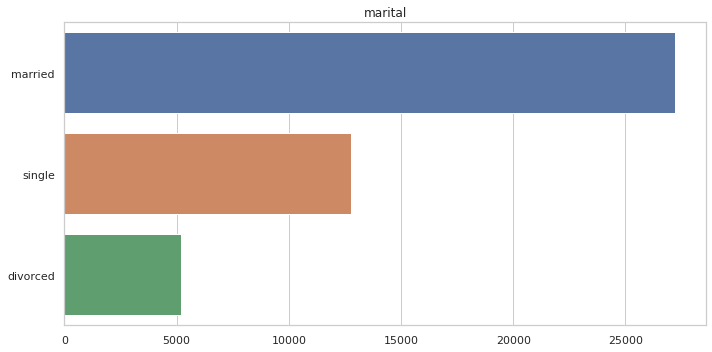

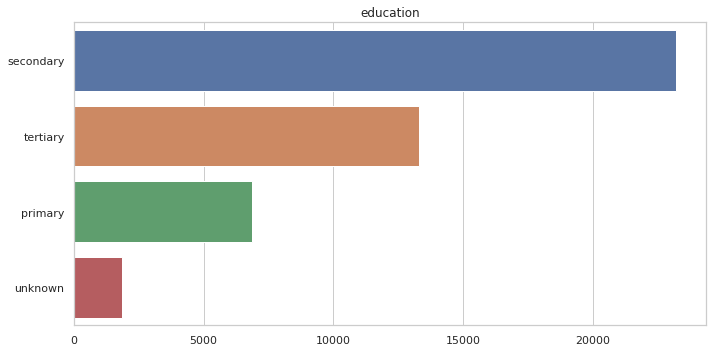

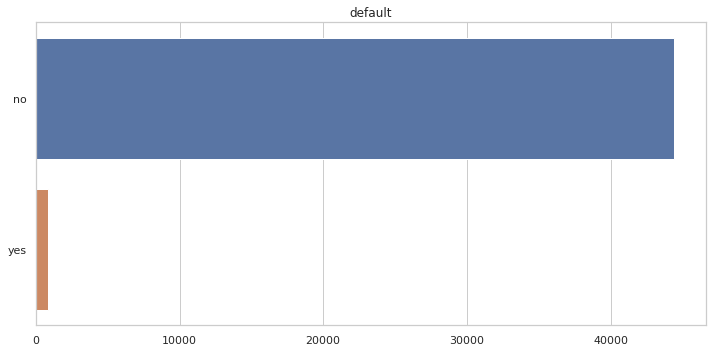

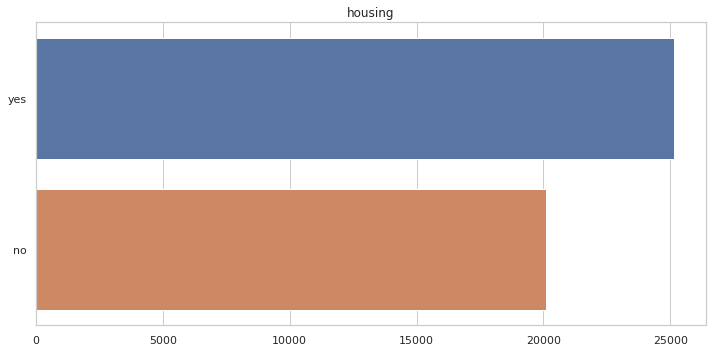

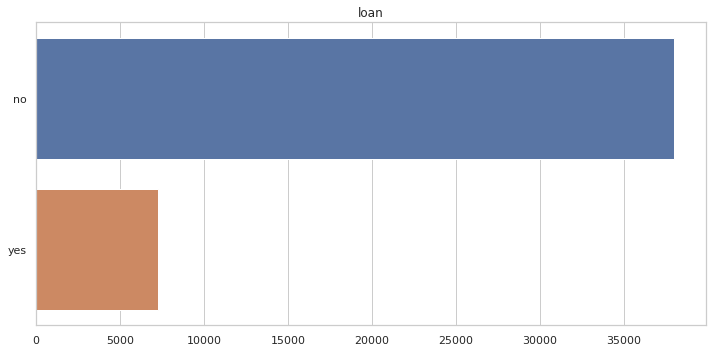

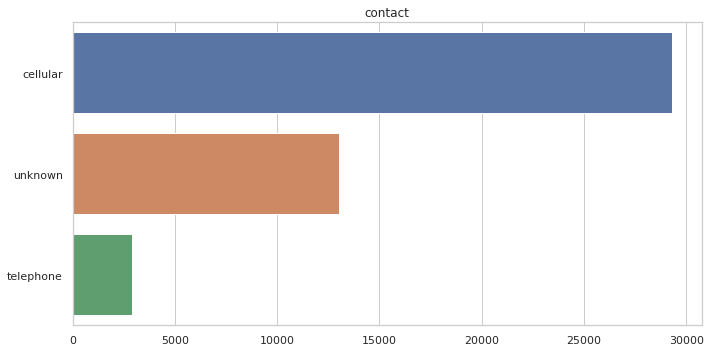

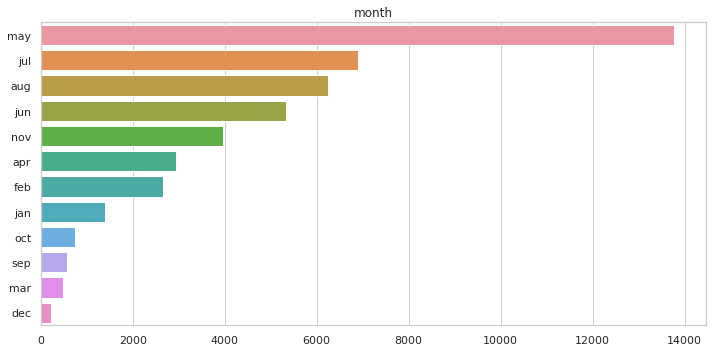

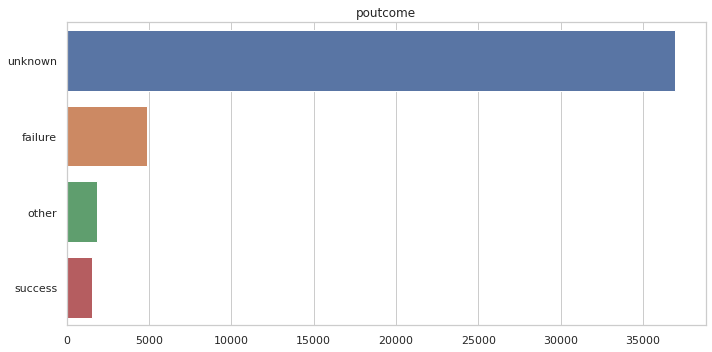

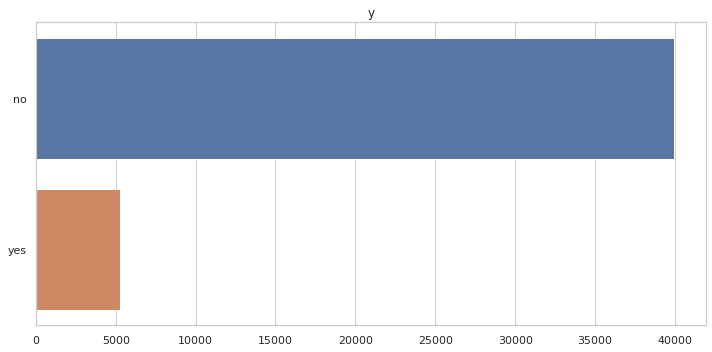

In [ ]:
for col in category_features:
    plt.figure(figsize=(10,5))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=df)
    plt.title(col)
    plt.tight_layout()

In [ ]:
df = df.drop(['duration'], axis=1)

In [ ]:
# load X and y
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (36168, 15)
Number transactions y_train dataset:  (36168,)
Number transactions X_test dataset:  (9043, 15)
Number transactions y_test dataset:  (9043,)


In [ ]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print(numeric_features)
print(category_features)

['age' 'balance' 'day' 'campaign' 'pdays' 'previous']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


In [ ]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # list of category columns
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names(category_features.tolist())

    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames

    # convert numpy array to dataframe
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)

    return transformed_array, df

In [ ]:
# impute missing numerical values with a median value, then scale the values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# impute missing categorical values using the 'missing' and one hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Each transformer is a three-element tuple that defines
#                                 the name of the transformer,
#                                 the transform to apply,
#                                 and the column features to apply it to
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [ ]:
# transform training and test set and then convert it to dataframe
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
13932,1.515061,-0.231637,-0.698514,-0.567836,-0.410222,-0.241405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9894,-0.369597,0.106038,-0.818717,-0.567836,-0.410222,-0.241405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39946,-0.558063,0.470635,-1.660136,0.402837,0.560728,0.585721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9217,-0.558063,-0.375660,-1.299528,-0.567836,-0.410222,-0.241405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4124,-0.275365,-0.340303,0.383311,-0.567836,-0.410222,-0.241405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_columns = X_train_t.columns
print(X_train_columns)

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [ ]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'no': 31942, 'yes': 4226})
Counter({'yes': 31942, 'no': 31942})


In [ ]:
from sklearn.svm import SVC

final_X_train = pd.DataFrame(data=X_train_smote,columns=X_train_columns )
final_y_train = pd.DataFrame(data=y_train,columns=['y'])

rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), 25)
rfe_model = rfe_model.fit(final_X_train, final_y_train)

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

[False False False  True False False False False  True  True False  True
 False False False False False  True False False  True False False False
 False False  True  True False False  True  True False  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True]
[19 16 25  1 24 21 17 18  1  1 20  1 14  9  3 26 13  1 22 10  1  7 15 12
  4  8  1  1  5  2  1  1 11  1 23  1  1  1  1  1  6  1  1  1  1  1  1  1
  1  1]


In [ ]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['campaign', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_unknown', 'marital_single', 'default_yes', 'housing_no', 'loan_yes', 'contact_cellular', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [ ]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,campaign,job_entrepreneur,job_housemaid,job_retired,job_unknown,marital_single,default_yes,housing_no,loan_yes,contact_cellular,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,3.961971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32046,-0.567836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13318,0.726394,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42991,1.373510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14237,-0.244279,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test_final)))

Accuracy of logistic regression classifier on test set: 0.74
